# Ch/ChE 164 Project
## Marta Gonzalvo
## March 18$^{\mathrm{th}}$, 2020

In this python notebook I have included both the required analysis and results, as well as the necessary code. Below all the necessary imports:

In [12]:
import itertools
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import bokeh_catplot

import bokeh.io
import bokeh.plotting

bokeh.io.output_notebook()

Loading BokehJS ...

## 0. Energy

#### a) Occupation of cells contribution:
\begin{align}
    4\,\epsilon \sum_{i=1}^{L}s_i
\end{align}
Each water cell is surrounded by 4 nanotube cells.  If $s_i = 1$, the contribution will be $4\,\epsilon$, and if $s_i = -1$, the contribution will be $-4\,\epsilon$. So the penalty per cell of water occupation is of $2\,\epsilon$.
#### b) Pairing of spins contribution:
\begin{align}
    - J \sum_{j=0}^{L}s_j s_{j+1}
\end{align} 
So for $L$ cells there are $L+1$ interactions, and we use the same method as above to penalyze different adjacent occupations by $2J$. And taking into account the boundary conditions, where the adjacent cells to the $s_1$ and $s_L$ cells will always be filled with water: $s_0 = s_{i+1} = 1$, we can rewrite that as 
\begin{align}
    - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L
\end{align}
So the Hamiltonian has the form of 
\begin{align}
   H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L
\end{align}

Code to calculate the hamiltonian energy:

In [2]:
def Energy(eps, J, spins):
    '''Computes the Energy for a given microstate, unitless (E/(kB*T).
    eps, J are unitless constants (divided by kB*T), spins is a list.'''
    
    coup_wat_nanot = 4*eps*np.sum(spins)
    
    coup_spins = [spins[i]*spins[i+1] for i,_ in enumerate(spins[:-1])]
    coup_wat = - J*(np.sum(coup_spins) + spins[0] + spins[-1])
    
    return coup_wat_nanot + coup_wat

Testing function Energy.

In [3]:
spins_L = [1,1,1,1,1]
spins_0 = [-1,-1,-1,-1,-1]
spins_other = [1, -1, 1]
e_test = 1
J_test = 2

print('Energy N=L, E=', Energy(e_test, J_test, spins_L))
print('Energy N=0, E=',Energy(e_test, J_test, spins_0))
print('Energy test 3, E=',Energy(e_test, J_test, spins_other))

Energy N=L, E= 8
Energy N=0, E= -24
Energy test 3, E= 4


Function to generate all possible microstates:

In [6]:
def microstates(L=5, s_vals=[-1,1]):
    '''Generates all possible microstates, 
    given length of system and possible values of s_i'''
    
    return np.unique(np.random.choice(s_vals, size=(L*200,L)), axis=0)

In [112]:
print(len(microstates()))
microstates()

32


array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1],
       [-1, -1, -1,  1, -1],
       [-1, -1, -1,  1,  1],
       [-1, -1,  1, -1, -1],
       [-1, -1,  1, -1,  1],
       [-1, -1,  1,  1, -1],
       [-1, -1,  1,  1,  1],
       [-1,  1, -1, -1, -1],
       [-1,  1, -1, -1,  1],
       [-1,  1, -1,  1, -1],
       [-1,  1, -1,  1,  1],
       [-1,  1,  1, -1, -1],
       [-1,  1,  1, -1,  1],
       [-1,  1,  1,  1, -1],
       [-1,  1,  1,  1,  1],
       [ 1, -1, -1, -1, -1],
       [ 1, -1, -1, -1,  1],
       [ 1, -1, -1,  1, -1],
       [ 1, -1, -1,  1,  1],
       [ 1, -1,  1, -1, -1],
       [ 1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1],
       [ 1, -1,  1,  1,  1],
       [ 1,  1, -1, -1, -1],
       [ 1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1],
       [ 1,  1,  1, -1, -1],
       [ 1,  1,  1, -1,  1],
       [ 1,  1,  1,  1, -1],
       [ 1,  1,  1,  1,  1]])

Better way of doing below: unfinished.

In [8]:
#microst = ["".join(seq) for seq in itertools.product("01", repeat=5)]
#microst_string = [list(i) for i in microst]
#microst_string

# Part 1

The partition function for the system is 
\begin{align}
 Z = \sum_{\{s\}} e^{-\beta H(\{s\})}.
\end{align}
So the probability for  a macrostate is 
\begin{align}
P(N)= \frac{\sum_{\{s\}} e^{-\beta H(\{s\})}\delta(N-\sum^L_{i=1}m_i(s_i))}{\sum_{\{s\}} e^{-\beta H(\{s\})}}, 
\end{align}
where $m_i(s_i) = \frac{1+s_i}{2}$, and $\sum_i m_i = N$.

For the case where the totally filled ($N=L$) and totally empty ($N=0$) microstates are degenerate, $H\,\{1,1,1,1,1\} = H\,\{-1,-1,-1,-1,-1\}$.
\begin{align}
H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L \\
H\,\{1,1,1,1,1\} = 4\,\epsilon \, 5 - 4 J  - J - J  = 20 \, \epsilon - 6 J \\
H\,\{-1,-1,-1,-1,-1\} = - 4\,\epsilon \, 5 - 4 J  + J + J = - 20 \, \epsilon - 2 J \\
H\,\{1,1,1,1,1\} = H\,\{-1,-1,-1,-1,-1\} \\
20 \, \epsilon - 6 J = - 20 \, \epsilon - 2 J \\
40 \, \epsilon =  4 J \\
\epsilon = 0.1 J
\end{align}

# align center


In [220]:
def partition_fn(eps, J, microstates=microstates()):
    '''Returns partition function for all microstates.'''
    
    return np.sum(np.exp(-Energy(eps, J, spins)) for spins in microstates)

In [4]:
def m_i(spins):
    '''Computes list of m_i, given list of spins.
    s_i=1, m_i=1. s_i=-1, m_i=0'''
    
    m_i = [(1+s)/2 for s in spins]
    return m_i

Testing m_i function.

In [5]:
spins_L = [1,1,1,1,1]
spins_0 = [-1,-1,-1,-1,-1]
spins_other = [1, -1, 1]

print('L, m_i', m_i(spins_L))
print('0, m_i', m_i(spins_0))
print('other, m_i', m_i(spins_other))

L, m_i [1.0, 1.0, 1.0, 1.0, 1.0]
0, m_i [0.0, 0.0, 0.0, 0.0, 0.0]
other, m_i [1.0, 0.0, 1.0]


Calculate probability of a single microstate. 

In [216]:
def probability_microstate(eps, J, spins, N, L=5, microstates=microstates()):    
    '''Computes probability of given microstate. 
    Microstates is list of lists of spins. 
    Returns a single value'''
    
    if np.sum(m_i(spins)) == N:
        
        return np.exp(-Energy(eps, J, spins))/partition_fn(eps, J, microstates)
    else:
        
        return 0 

Calculates the probability of a macrostate. Possible macrostates: $\{N\}=\{0, 1, 2, 3, 4, 5\}$.

In [217]:
def probability_macrostate(eps, J, N, L=5, microstates=microstates()):    
    '''Computes probability of given macrostate. 
    Microstates is list of lists of spins.
    Returns a single value.'''
        
    return np.sum([probability_microstate(eps, J, spins, N, L, microstates) 
                   for spins in microstates])

Calculate list of probability of all macrostates.

In [218]:
def all_probs(eps, J, L=5, microstates=microstates()):
    '''Calculates all probabilities for all macrostates.
    Returns a list of probabilities for each macrostate.'''
    all_probs = []
    
    for N in list(range(L+1)):
        
        prob_N = np.sum([probability_microstate(eps, J, spins, N, L, microstates) 
                         for spins in microstates])
        all_probs.append(prob_N)
        
    return all_probs

Plot of $P(N)$.

In [116]:
macrostates = [0,1,2,3,4,5]

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


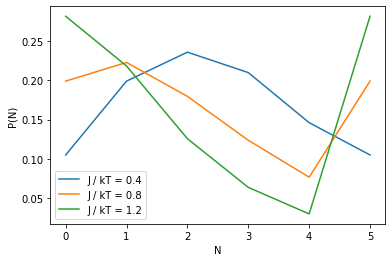

In [221]:
J_part1 = [0.4, 0.8, 1.2]

for J in J_part1:
    plt.plot(macrostates, all_probs(J/10, J), label='J / kT = {}'.format(J));
plt.legend();
plt.xlabel('N');
plt.ylabel('P(N)');

# INTERPRET RESULTS
J increasing or T decreasing as p.4-> 0.8
J: energy of creating a surface
if J=0: no E penalty, doesn't matter if gas or water. Low J, low surface tension, high J, high surface tension
high J: most likely no interface
(opposite as here)

REVISIT PLOT

Checking how these results match with the number of microstates for each macrostate.

| N | # microstates |
|---|----|
| 0 | 1 |
| 1 | 5 |
| 2 | 10 |
| 3 | 5 |
| 4 | 10 |
| 5 | 1 |

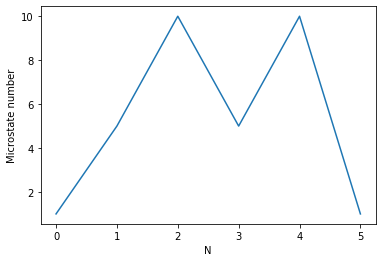

In [310]:
mic_numb = [1,5,10,5,10,1]
plt.plot(macrostates, mic_numb);
plt.xlabel('N');
plt.ylabel('Microstate number');

Calculating free energy $F(N)$.

In [147]:
def free_energy(eps, J, L=5, microstates=microstates()):
    '''Calculates free energy given the probability for a macrostate.'''

    return -np.log(all_probs(eps, J, L, microstates))

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


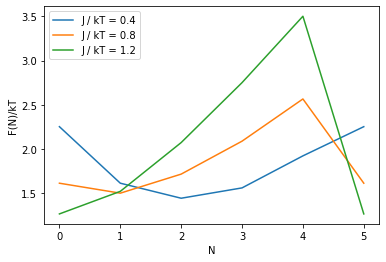

In [222]:
for J in J_part1:
    plt.plot(macrostates, free_energy(J/10, J), label='J / kT = {}'.format(J));

plt.legend();
plt.xlabel('N');
plt.ylabel('F(N)/kT');

# interpret results

## Surface tension

For each interface of area $d^2 = 3.7^2 \, \unicode[serif]{xC5} ^2 $, there is a $2J$ penalty, so the expression relating the two using the surface tension is 
\begin{align}
2 J = \gamma d^2.
\end{align}
Using the value of $\gamma = 72$ mN/m $= 72$ mJ/$\mathrm{m}^2 =$ 0.072 J/$\mathrm{m}^2$, we can get $J$, or $J/k_B T$:
\begin{align}
2 J = \gamma d^2 \\
2 J = 0.072 \, \mathrm{J/m}^2 \, (3.7·10^{-10})^2 \, \mathrm{m}^2 \\
J = 4.928·10^{-21}\\
J/k_B T = 1.2
\end{align}

The value that corresponds to $J/k_B T$ at room temperature is $J/k_B T = 1.2$.

In [158]:
# Calculation
J = ((3.7*(10**(-10)))**2 * 0.072/2)
print(J)
J/(298*1.380649*(10**(-23)))

4.9284000000000005e-21


1.197860935948025

# Part 2

In this plot above I show filled, empty and bistable occupancy. In the plots below I show the three separately, so they are easier to identify:

- under 0.05 mostly filled
- between 0.12-0.15 it is bistable
- over 0.4 mostly empty

# THIS IS BISTABILITY RIGHT?

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


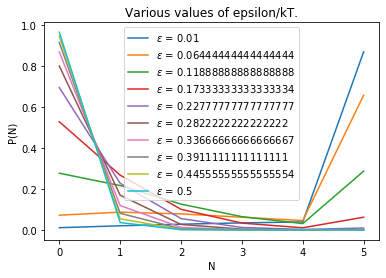

In [223]:
eps_var = np.linspace(0.01,0.5, 10)
J_rt = 1.198

for eps in eps_var:
    plt.plot(macrostates, all_probs(eps, J_rt), label='$\epsilon$ = {}'.format(eps));

plt.title('Various values of epsilon/kT.')
plt.legend();
plt.xlabel('N');
plt.ylabel('P(N)');

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


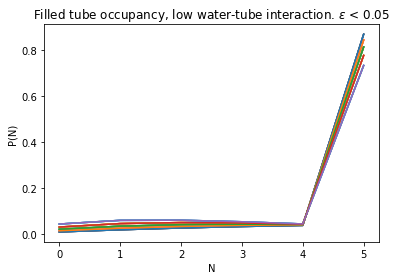

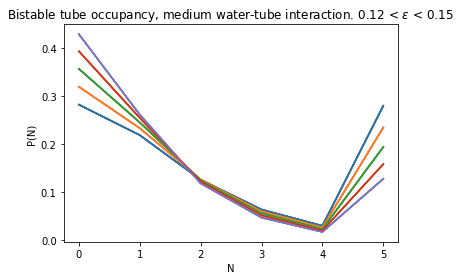

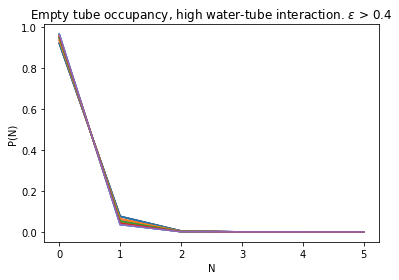

In [224]:
#Defining epsilon values
eps_filled = np.linspace(0.01,0.05, 5)
eps_bistable = np.linspace(0.12,0.15, 5)
eps_empty = np.linspace(0.4,0.5, 5)

#Filled
for eps in eps_filled:
    plt.plot(macrostates, all_probs(eps_filled, J_rt));

plt.title('Filled tube occupancy, low water-tube interaction. $\epsilon$ < 0.05')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()

#Bistable
for eps in eps_bistable:
    plt.plot(macrostates, all_probs(eps_bistable, J_rt));

plt.title('Bistable tube occupancy, medium water-tube interaction. 0.12 < $\epsilon$ < 0.15 ')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()



#Empty
for eps in eps_empty:
    plt.plot(macrostates, all_probs(eps_empty, J_rt));

plt.title('Empty tube occupancy, high water-tube interaction. $\epsilon$ > 0.4')
plt.xlabel('N');
plt.ylabel('P(N)');

# Part 3

# OK J/eps? otherwise how calc both, and N?

In [ ]:
SAMPLE MATPLOTLIB

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

## Option A: J vs $\epsilon$, contour of P(N). 6 different plots.

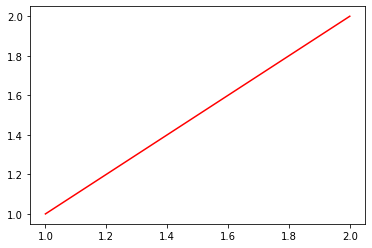

In [281]:
col = np.linspace(0,1,8)
y= [1,2]
x=[1,2]
plt.plot(x, y, color='r')

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


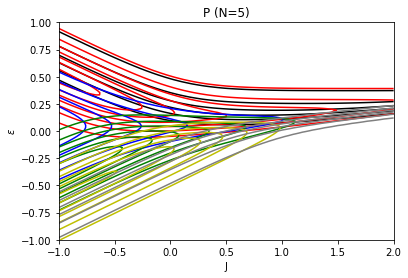

In [280]:
J_part3 = np.linspace(-1, 2, 100)
eps_part3 = np.linspace(-1, 1, 100)

J_mesh, ep_mesh = np.meshgrid(J_part3, eps_part3)
colors=['k', 'r', 'b', 'g', 'y', '0.5']

plt.figure()
for i, N in enumerate(macrostates):
    
    P = probability_macrostate(ep_mesh, J_mesh, N)
    plt.contour(J_mesh, ep_mesh, P, colors='{}'.format(colors[i]))
    plt.title('P (N={})'.format(N))
    plt.xlabel('J')
    plt.ylabel('$\epsilon$')
    
plt.show()

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


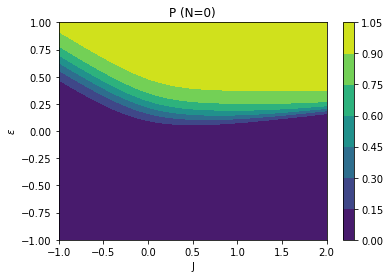

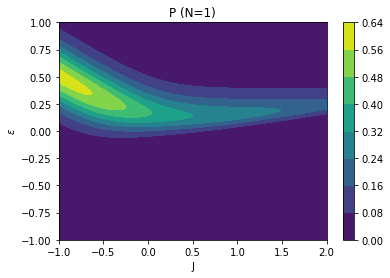

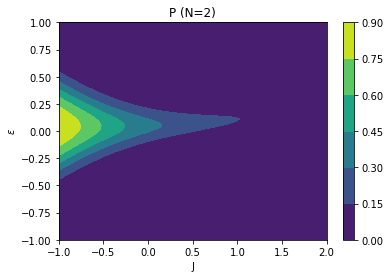

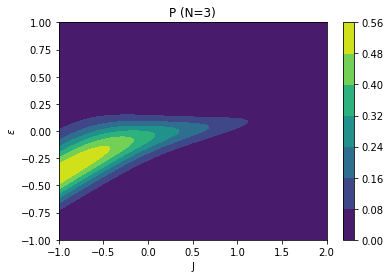

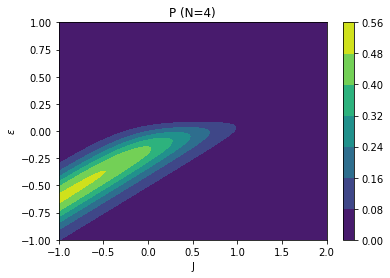

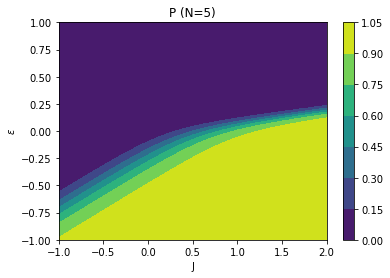

In [284]:
J_part3 = np.linspace(-1, 2, 100)
eps_part3 = np.linspace(-1, 1, 100)

J_mesh, ep_mesh = np.meshgrid(J_part3, eps_part3)


for N in macrostates:
    
    P = probability_macrostate(ep_mesh, J_mesh, N)
    plt.figure()
    plt.contourf(J_mesh, ep_mesh, P)
    plt.title('P (N={})'.format(N))
    plt.xlabel('J')
    plt.ylabel('$\epsilon$')
    plt.colorbar()


C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


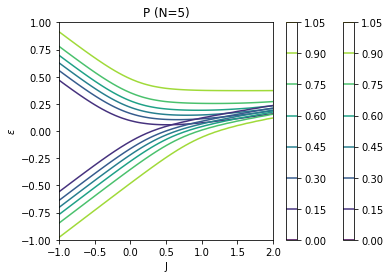

In [305]:
J_part3_f_l = np.linspace(-1, 2, 100)
eps_part3_f_l = np.linspace(-1, 1, 100)

J_mesh_f_l, ep_mesh_f_l = np.meshgrid(J_part3_f_l, eps_part3_f_l)

first_last_mac = [0,5]
for N in first_last_mac:
    
    P = probability_macrostate(ep_mesh_f_l, J_mesh_f_l, N)
    #plt.figure()
    plt.contour(J_mesh_f_l, ep_mesh_f_l, P)
    plt.title('P (N={})'.format(N))
    plt.xlabel('J')
    plt.ylabel('$\epsilon$')
    plt.colorbar()

Region J > 1, $\epsilon$ > 0 ?

## Option 2. N vs $\epsilon$/J, plots P(N)
colorschemes: http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.
C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


TypeError: Number of dimensions of x and y should match.

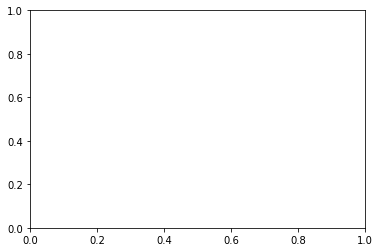

In [243]:
J_part3 = np.linspace(-1, 100, 6)
eps_part3 = np.linspace(-1, 0.7, 100)

J_mesh, ep_mesh = np.meshgrid(J_part3, J_part3)
  
P = probability_macrostate(ep_mesh, J_mesh, N)
plt.figure()
plt.contour(N, J_mesh, P)
plt.title('P (N={})'.format(N))
plt.xlabel('N')
plt.ylabel('$\epsilon $ / J')


# Part 4

push it to my github repository